In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import os
from statsmodels.tsa.arima_model import ARIMA


In [2]:
TRAIN_PATH = 'final_data.csv'

def read_large_file(path = TRAIN_PATH, chunksize = 1000000, col= None,
                    filename= 'voiro_final.feather',format_type = '%Y-%m-%d %H:%M'):

    df_list = []
    for df_chunk in tqdm(pd.read_csv(path,chunksize= chunksize)):


        try:

            for c in col:

                df_chunk[c] = df_chunk[c].str.slice(0, 16)

                df_chunk[c] = pd.to_datetime(df_chunk[c], format=format_type)

                df_list.append(df_chunk)

        except:

            print("Operation failed to perform")

            return None

    train_df = pd.concat(df_list)

    del df_list

    train_df.to_feather(os.path.join(TRAIN_PATH + filename))

    return train_df


df= read_large_file(col=['date'])

20it [01:05,  2.54s/it]


In [ ]:
%%time
# load the same dataframe next time directly, without reading the csv file again!
train_df_new = pd.read_feather('final_data.csvvoiro_final.feather')

In [4]:
df.dtypes

id                            int64
prediction                    int64
date                 datetime64[ns]
age                           int64
gender                        int64
impressions                   int64
Ad starts                     int64
clicks                        int64
ad 25% completed              int64
ad 50% completed              int64
ad 75% completed              int64
ad 100% completed             int64
ad closed                   float64
adFormat_id                 float64
genre_id                    float64
metaData_id                 float64
sbu_id                      float64
title_id                    float64
age_scaled                  float64
imp_scaled                  float64
dtype: object

In [ ]:
#df = df[df.id != 'id']
# def dtypeconv(col,data_type):
#     for i in col:
#         df[i] = df[i].astype(data_type)

# dtypeconv(['id', 'prediction','age', 'gender', 'impressions', 'Ad starts','clicks', 'ad 25% completed', 
#            'ad 50% completed', 'ad 75% completed',
#            'ad 100% completed'],int)

# dtypeconv(['ad closed', 'adFormat_id', 'genre_id','metaData_id', 'sbu_id', 
#            'title_id', 'age_scaled', 'imp_scaled'],float)

In [5]:
df.head()

id  prediction       date  age  gender  impressions  Ad starts  clicks  \
0    26           3 2018-01-01   13       0            1          1       0   
1    29           2 2018-01-01   38       0            2          2       0   
2   474           3 2018-01-01   17       0            6          6       0   
3   964           1 2018-01-01    0       2            6          6       0   
4  1677           3 2018-01-01   14       0            4          4       0   

   ad 25% completed  ad 50% completed  ad 75% completed  ad 100% completed  \
0                 1                 1                 1                  1   
1                 2                 2                 2                  2   
2                 6                 6                 5                  5   
3                 6                 5                 5                  5   
4                 4                 4                 4                  4   

   ad closed  adFormat_id  genre_id  metaData_id  sbu_id  title_id  \
0        0.0          3.0       8.0       1940.0    54.0     825.0   
1        0.0          1.0      16.0       2040.0    24.0     213.0   
2        0.0          1.0       5.0       2001.0     1.0      55.0   
3        0.0          1.0      16.0       2040.0    21.0     185.0   
4        0.0          1.0       8.0       2012.0     1.0     978.0   

   age_scaled    imp_scaled  
0    0.216667  8.365926e-07  
1    0.633333  1.673185e-06  
2    0.283333  5.019555e-06  
3    0.000000  5.019555e-06  
4    0.233333  3.346370e-06

In [ ]:
#data cluster divison 
Cluster_list = []
def CluseterDivide():
     for i in range(df.prediction.min(),df.prediction.max()):
            Cluster_list.append(df[df.prediction == i])

CluseterDivide()

In [6]:
df_ageband1 = df[df.age.between(10,20)]
#df_agegroup2 = df[df.age.between(20,35)]

In [7]:
df_ageband1.head()

id  prediction       date  age  gender  impressions  Ad starts  clicks  \
0     26           3 2018-01-01   13       0            1          1       0   
2    474           3 2018-01-01   17       0            6          6       0   
4   1677           3 2018-01-01   14       0            4          4       0   
5   1697           3 2018-01-01   17       1            1          1       0   
10  2250           3 2018-01-01   16       1           22         22       0   

    ad 25% completed  ad 50% completed  ad 75% completed  ad 100% completed  \
0                  1                 1                 1                  1   
2                  6                 6                 5                  5   
4                  4                 4                 4                  4   
5                  1                 1                 1                  1   
10                21                20                20                 20   

    ad closed  adFormat_id  genre_id  metaData_id  sbu_id  title_id  \
0         0.0          3.0       8.0       1940.0    54.0     825.0   
2         0.0          1.0       5.0       2001.0     1.0      55.0   
4         0.0          1.0       8.0       2012.0     1.0     978.0   
5         0.0          1.0       5.0       2010.0     1.0      54.0   
10        0.0          1.0       5.0       2000.0     1.0    1048.0   

    age_scaled    imp_scaled  
0     0.216667  8.365926e-07  
2     0.283333  5.019555e-06  
4     0.233333  3.346370e-06  
5     0.283333  8.365926e-07  
10    0.266667  1.840504e-05

In [8]:
#training and testing data

train_df = df_ageband1[df_ageband1['date'].between('2018-01-01','2018-03-15')]
#test_df = df_ageband1.iloc['2018-03']
train_df.head()

id  prediction       date  age  gender  impressions  Ad starts  clicks  \
0     26           3 2018-01-01   13       0            1          1       0   
2    474           3 2018-01-01   17       0            6          6       0   
4   1677           3 2018-01-01   14       0            4          4       0   
5   1697           3 2018-01-01   17       1            1          1       0   
10  2250           3 2018-01-01   16       1           22         22       0   

    ad 25% completed  ad 50% completed  ad 75% completed  ad 100% completed  \
0                  1                 1                 1                  1   
2                  6                 6                 5                  5   
4                  4                 4                 4                  4   
5                  1                 1                 1                  1   
10                21                20                20                 20   

    ad closed  adFormat_id  genre_id  metaData_id  sbu_id  title_id  \
0         0.0          3.0       8.0       1940.0    54.0     825.0   
2         0.0          1.0       5.0       2001.0     1.0      55.0   
4         0.0          1.0       8.0       2012.0     1.0     978.0   
5         0.0          1.0       5.0       2010.0     1.0      54.0   
10        0.0          1.0       5.0       2000.0     1.0    1048.0   

    age_scaled    imp_scaled  
0     0.216667  8.365926e-07  
2     0.283333  5.019555e-06  
4     0.233333  3.346370e-06  
5     0.283333  8.365926e-07  
10    0.266667  1.840504e-05

In [9]:
test_df = df_ageband1[df_ageband1['date'].between('2018-03-16','2018-03-31')]
test_df.head()

id  prediction       date  age  gender  impressions  Ad starts  \
9171  51540117192           3 2018-03-17   18       0            2          2   
9173  51540117571           3 2018-03-17   19       0            3          3   
9175  51540117869           3 2018-03-17   16       0            9         10   
9182  51540118880           3 2018-03-17   19       0            1          1   
9190  51540120704           3 2018-03-17   19       1            1          1   

      clicks  ad 25% completed  ad 50% completed  ad 75% completed  \
9171       0                 2                 2                 2   
9173       0                 3                 3                 3   
9175       0                 9                 7                 5   
9182       0                 1                 1                 1   
9190       0                 1                 1                 1   

      ad 100% completed  ad closed  adFormat_id  genre_id  metaData_id  \
9171                  2        0.0          1.0       1.0       2569.0   
9173                  3        0.0          3.0       8.0       2484.0   
9175                  5        0.0          3.0       8.0       2489.0   
9182                  1        0.0          3.0      16.0       2574.0   
9190                  1        0.0          3.0       9.0       2488.0   

      sbu_id  title_id  age_scaled    imp_scaled  
9171     1.0      74.0    0.300000  1.673185e-06  
9173     5.0      57.0    0.316667  2.509778e-06  
9175     1.0      41.0    0.266667  7.529333e-06  
9182    14.0    1535.0    0.316667  8.365926e-07  
9190     1.0      53.0    0.316667  8.365926e-07

In [10]:
#df_agegroup1final = df_ageband1.groupby('date')['impressions'].sum()


# need to do agg based on age and gender................
train_date_agg = train_df.groupby('date')['impressions'].sum()

In [81]:
train_title_age_agg = train_df.groupby(['date','age'])['impressions'].sum()
p = train_title_age_agg
p
# train_df.title_id.nunique()

date        age
2018-01-01  12       2979
            13     112544
            14      18855
            15      31144
            16      45933
            17      89500
            18     160370
            19     208606
            20     229010
2018-01-02  12       3179
            13     145656
            14      23029
            15      36542
            16      51686
            17     113284
            18     200493
            19     255933
            20     296129
2018-01-03  12       3393
            13     157476
            14      23479
            15      35634
            16      46984
            17     105176
            18     175026
            19     223315
            20     251192
2018-01-04  12       3258
            13     140028
            14      21652
                    ...  
2018-03-12  18     130542
            19     160055
            20     160431
2018-03-13  12       5247
            13     152458
            14      27292
            15      31

In [28]:
test_date_agg = test_df.groupby('date')['impressions'].sum()
test_date_agg

date
2018-03-16     788977
2018-03-17     734041
2018-03-18     661283
2018-03-19     847724
2018-03-20     922686
2018-03-21     863874
2018-03-22     913434
2018-03-23     982211
2018-03-24     960128
2018-03-25     728846
2018-03-26     960326
2018-03-27    1087049
2018-03-28     980315
2018-03-29    1160461
2018-03-30     747712
2018-03-31     547068
Name: impressions, dtype: int64

In [11]:
# dframe_agegroup1 = df_agegroup1final.to_frame()
# dframe_agegroup1.head()

dframe_agegroup1 = train_date_agg.to_frame()
dframe_agegroup1.head()

impressions
date                   
2018-01-01       898941
2018-01-02      1125931
2018-01-03      1021675
2018-01-04       950283
2018-01-05       936862

In [29]:
dframe_agegroup1_test = test_date_agg.to_frame()
dframe_agegroup1_test.head()

impressions
date                   
2018-03-16       788977
2018-03-17       734041
2018-03-18       661283
2018-03-19       847724
2018-03-20       922686

In [30]:
#calculating mean and std for months
def Calculate_Mean_and_std(df,months=3,lb=[],ub=[]):
    months_mean = []
    months_std = []
    for i in range(0,months):
        months_mean.append(df[lb[i]:ub[i]].mean())
        months_std.append(df[lb[i]:ub[i]].std())
    return [months_mean,months_std]

lb= ['2018-01-01','2018-02-01','2018-03-01']
ub= ['2018-01-31','2018-02-28','2018-03-15']
months_mean,months_std= Calculate_Mean_and_std(dframe_agegroup1,3,lb=lb,ub=ub)

In [31]:
lb= ['2018-03-16']
ub= ['2018-03-31']
months_mean_test,months_std_test= Calculate_Mean_and_std(dframe_agegroup1_test,1,lb=lb,ub=ub)

In [32]:
def outlier_Detection(df,mean,std,lbd,ubd):
    UCL = mean + std
    LCL = mean - std
    
    month_data = df[lbd:ubd]
    month_data.loc[month_data['impressions'] > UCL['impressions'],'impressions'] = UCL['impressions']
    if LCL['impressions'] > 0:
        month_data.loc[month_data['impressions'] < LCL['impressions'],'impressions'] = LCL['impressions']
    return month_data

In [36]:
def outlier_Corrected_Data(df,mean,std,lbd,ubd):
    all_month_data = []
    for i in range(0,len(mean)):
        all_month_data.append(outlier_Detection(df,months_mean[i],months_std[i],lbd[i],ubd[i]))
    return all_month_data
                              
lbd = ['2018-01-01','2018-02-01','2018-03-01']
ubd = ['2018-01-31','2018-02-28','2018-03-15']
all_month_data = outlier_Corrected_Data(dframe_agegroup1,months_mean,months_std,lbd,ubd)

In [38]:
lbd = ['2018-03-16']
ubd = ['2018-03-31']
test_month_data = outlier_Corrected_Data(dframe_agegroup1_test,months_mean_test,months_std_test,lbd,ubd)

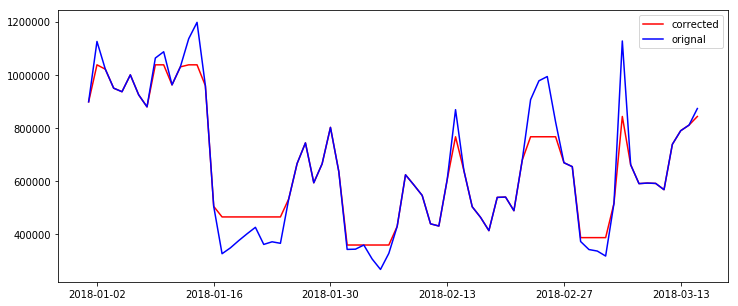

In [40]:
all_data = pd.concat(all_month_data)
plt.figure(figsize=(12,5))
plt.plot(all_data,color='red',label='corrected')
plt.plot(dframe_agegroup1,color='blue',label='orignal')
# plt.plot(test_month_data,color='green',label='test')
plt.legend()
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller

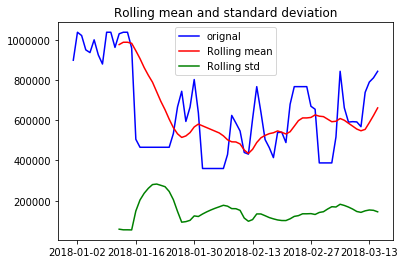

Test Statistic                 -3.083603
p-value                         0.027791
#Lags Used                      1.000000
Number of Observations Used    72.000000
Critical value (1%)            -3.524624
Critical value (5%)            -2.902607
Critical value (10%)           -2.588679
dtype: float64


In [43]:
def test_stationary(data):
    rolmean = data.rolling(12).mean()
    rolstd = data.rolling(12).std()


    orignal = plt.plot(data,color='blue',label='orignal')
    mean = plt.plot(rolmean,color='red',label='Rolling mean')
    std = plt.plot(rolstd,color='green',label='Rolling std')
    plt.legend()
    plt.title('Rolling mean and standard deviation')
    plt.show()

    #df test
    dftest = adfuller(data.iloc[:,0].values,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    dfoutput    

    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value

    print(dfoutput)

test_stationary(all_data)

In [44]:
from statsmodels.tsa.stattools import acf, pacf

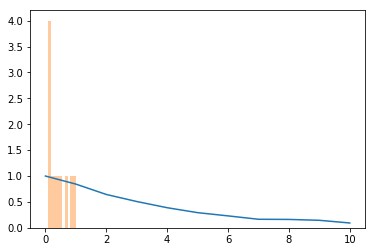

In [45]:
lag_acf = acf(all_data,nlags=10)
plt.plot(lag_acf)
sns.distplot(lag_acf,kde=False,bins=10)

In [46]:
lag_pacf = pacf(all_data,nlags=10,method='ols')
plt.plot(lag_pacf)
sns.distplot(lag_pacf,kde=False)

In [ ]:
model = ARIMA(all_data,order=(2,0,0))
result_AR = model.fit(disp=-1)
plt.plot(all_data)
plt.plot(result_AR.fittedvalues)
# ARdf = pd.DataFrame(result_AR.fittedvalues, columns=['#Passengers'])

# #RSS
# p = (ARdf-ts_log1_diff)**2
# p.sum()

In [ ]:
model = ARIMA(all_data,order=(0,0,2))
result_MA = model.fit(disp=-1)
plt.plot(all_data)
plt.plot(result_MA.fittedvalues)

In [ ]:
model = ARIMA(all_data,order=(2,0,2))
result_ARMA = model.fit(disp=-1)

plt.Figure(figsize=(12,5))
plt.plot(all_data,color='red',label='outlierfree')
plt.plot(dframe_agegroup1,color='blue',label='orignal')
plt.plot(result_ARMA.fittedvalues,color='black',label='predicted')

In [47]:
def fileWriter(result,filename):
    f = open(filename,'w')
    f.write(result)
    f.close()

In [48]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [49]:
def mean_absolute_percentage_error_by_row(y_true, y_pred):
    return (np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
def plot_timeseries(df_list,label,filename='graph.png'):
    plt.figure(figsize=(15,8))
    for i in range(0,len(df_list)):
        plt.plot(df_list[i],label=label[i])
        plt.legend()
        plt.savefig(filename)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 30); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 30); AIC=1156.576, BIC=1160.099, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 30); AIC=1143.400, BIC=1150.445, Fit time=0.810 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 30); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 30); AIC=1151.726, BIC=1157.009, Fit time=0.108 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 30); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 30); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 30); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 30); AIC=1148.751, BIC=1154.035, Fit time=0.581 seconds
Fit ARIMA: order=(2, 1, 

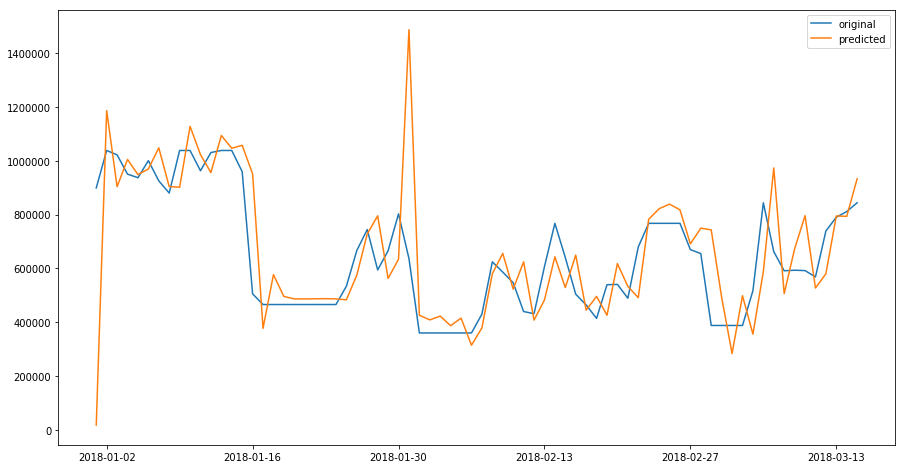

In [51]:
import pickle
from pyramid.arima import auto_arima
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
def arima_process(df,m_value=12,pikle=False,seasonality=False):
    %%time
    
    #seasonality checking as d represent seasonality
    
    if seasonality == False:
        d_value=0
        D_value=0
    else:
        d_value=1
        D_value=1
        
    stepwise_model = auto_arima(df, start_p=0, start_q=0,
                           max_p=2, max_q=2, m=m_value,
                           start_P=0, seasonal=seasonality,
                           d=d_value, D=D_value, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    
    fileWriter(stepwise_model.summary().as_html(),'auto_arima_summary.html')
    if pikle == True:        
        with open('arima_model.pkl','wb') as pkl:
            pickle.dump(stepwise_model,pkl)
            
    stepwise_model.fit(df)
    
    df_fitted= stepwise_model.arima_res_.fittedvalues

    data_fitted_frame = pd.DataFrame(df_fitted,columns=['predicted_values'],index=df.index)
    plot_timeseries([df,data_fitted_frame],['original','predicted'])
    mape = mean_absolute_percentage_error(df.iloc[:,0],data_fitted_frame['predicted_values'])
    return [stepwise_model,mape]



model,mape = arima_process(all_data,m_value=30,pikle=True,seasonality=True)
print("mape error is",mape)

In [57]:
def arima_prediction_model(df,model,period=15,frequency='D',index_col='predicted'):
    furure_prediction= model.predict(n_periods=period)
    last_date = df.index[-1]+ pd.Timedelta(days=1)
    date_frame = pd.DataFrame(pd.date_range(pd.datetime(last_date.year,last_date.month,last_date.day), periods=period,freq=frequency).tolist())
    future_forecast = pd.DataFrame(furure_prediction,index = date_frame.iloc[:,0],columns=[index_col])
    final_forecast = pd.concat([df,future_forecast],axis=0)
    final_forecast.plot()
    #print(future_forecast.head())
    mape_list = mean_absolute_percentage_error_by_row(test_date_agg['2018-03-16':],future_forecast['predicted'])
    future_forecast.to_excel('future_forecast.xlsx')
    return mape_list

mape_list = arima_prediction_model(all_data,model,period=16,frequency='D')

In [68]:
mape_frame = mape_list.to_frame()
#mape_frame.to_excel('mape_by_row.xlsx')
mape_frame.columns = ['mape']
mape_frame.sort_values(by='mape')

mape
date                 
2018-03-27   0.906107
2018-03-18   3.741441
2018-03-17   4.287115
2018-03-24   6.558210
2018-03-26   6.927805
2018-03-29   8.939560
2018-03-16  15.045112
2018-03-21  15.296357
2018-03-28  17.106848
2018-03-22  17.138443
2018-03-23  23.854221
2018-03-19  24.842394
2018-03-20  32.082591
2018-03-25  34.333949
2018-03-30  46.568393
2018-03-31  81.395398

In [54]:
test_date_agg.to_excel('test_groupby.xlsx')